# Phasing and recombination tutorial

In this tutorial you will extract information about the genotype phases and the recombination rate starting from VCF files.

## How to make this notebook work

* In this notebook we will use both the `command line bash` commands and `R` to setup the file folders.
* Having to shift between two languages, you need to choose a kernel every time we shift from one language to another. A kernel contains a programming language and the necessary packages to run the course material. To choose a kernel, go on the menu on the top of the page and select `Kernel --> Change Kernel`, and then select the preferred one. We will shift between two kernels, and along the code in this notebook you will see a picture telling you to change kernel. The two pictures are below:

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel
* You can run the code in each cell by clicking on the run cell sign in the toolbar, or simply by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>. When the code is done running, a small green check sign will appear on the left side.
* You need to run the cells in sequential order to execute the analysis. Please do not run a cell until the one above is done running, and do not skip any cells
* The code goes along with textual descriptions to help you understand what happens. Please try not to focus on understanding the code itself in too much detail - but rather try to focus on the explanations and on the output of the commands 
*   You can create new code cells by pressing `+` in the Menu bar above or by pressing <kbd>B</kbd> after you select a cell. 


## Learning outcomes

At the end of this tutorial you will be able to

- **Create** phased data and **discuss** the results through the genome viewer
- **Estimate and analyze** recombination maps
- **Plot** recombination maps in `R` and **compare** different populations

## Setting up folders

Here we setup a link to the `Data` folder and create the `Results` folder

<img src="img/bash.png" alt="Bash" width="80"> Choose the `Bash` kernel

In [1]:
ln -s ../../Data
mkdir -p Results

# Inferring the genotype phase (AKA Phasing)

During base calling, we identified the two bases at each position in each diploid individual. However, we do not know which base goes on which of the two chromosomes. That means that we do not know if the two haploid chromosomes look like the left or right example below:

    -----A-----C------         -----T-----C------ 
    -----T-----G------    or   -----A-----G------


To do that we use the program [Beagle](http://faculty.washington.edu/browning/beagle/beagle.html), which applies a clustering algorithm to call the genotype phase.

We put the jointly called bases for Africans, West Eurasians, and East Asians in these three files:

- Africa (9 individuals): `Data/vcf/Allvariants_africa.vcf`
- West Eurasia (10 individuals): `Data/vcf/Allvariants_westeurasia.vcf`
- Eash Asia (8 individuals): `Data/vcf/Allvariants_eastasia.vcf`

In this exercise we will just use the Africans and the West Eurasians.

## Running Beagle

For additional information see the [Beagle 4.1 manual](https://faculty.washington.edu/browning/beagle/beagle_4.1_03Oct15.pdf)

To obtain phased data, Beagle needs a [genetic map](https://www.genome.gov/genetics-glossary/Genetic-Map). Genetic maps for widely used organisms (humans, mice, yeast, ...) are already available online. You can find the genetic map for chr2 (hg19 assembly) here: `Data/genetic_map/plink.chr2.GRCh37.map`.

We run `Beagle` on the african vcf file. `Beagle` is written in `java` language in a file with extension `.jar`, so we call it using `java -jar`.

In [2]:
java -jar Data/software/beagle.08Jun17.d8b.jar \
        gt=Data/vcf/Allvariants_africa.vcf \
        map=Data/genetic_map/plink.chr2.GRCh37.map \
        out=Results/Allvariants_africa_phased

beagle.08Jun17.d8b.jar (version 4.1)
Copyright (C) 2014-2015 Brian L. Browning
Enter "java -jar beagle.08Jun17.d8b.jar" for a summary of command line arguments.
Start time: 10:07 AM CEST on 04 May 2023

Command line: java -Xmx22412m -jar beagle.jar
  gt=Data/vcf/Allvariants_africa.vcf
  map=Data/genetic_map/plink.chr2.GRCh37.map
  out=Results/Allvariants_africa_phased

reference samples:       0
target samples:         10

Window 1 [ 2:135000277-144999565 ]
target markers:      49868

Starting burn-in iterations

Window=1 Iteration=1
Time for building model:         0 seconds
Time for sampling (singles):     0 seconds
DAG statistics
mean edges/level: 3      max edges/level: 8
mean edges/node:  1.596  mean count/edge: 7

Window=1 Iteration=2
Time for building model:         0 seconds
Time for sampling (singles):     0 seconds
DAG statistics
mean edges/level: 4      max edges/level: 10
mean edges/node:  1.385  mean count/edge: 5

Window=1 Iteration=3
Time for building model:         0 se

We run the same command for the west eurasian vsc file:

In [3]:
java -jar Data/software/beagle.08Jun17.d8b.jar \
        gt=Data/vcf/Allvariants_westeurasia.vcf \
        map=Data/genetic_map/plink.chr2.GRCh37.map \
        out=Results/Allvariants_westeurasia_phased

beagle.08Jun17.d8b.jar (version 4.1)
Copyright (C) 2014-2015 Brian L. Browning
Enter "java -jar beagle.08Jun17.d8b.jar" for a summary of command line arguments.
Start time: 10:07 AM CEST on 04 May 2023

Command line: java -Xmx22412m -jar beagle.jar
  gt=Data/vcf/Allvariants_westeurasia.vcf
  map=Data/genetic_map/plink.chr2.GRCh37.map
  out=Results/Allvariants_westeurasia_phased

reference samples:       0
target samples:         10

Window 1 [ 2:135000277-144999565 ]
target markers:      49868

Starting burn-in iterations

Window=1 Iteration=1
Time for building model:         1 second
Time for sampling (singles):     0 seconds
DAG statistics
mean edges/level: 3      max edges/level: 8
mean edges/node:  1.225  mean count/edge: 7

Window=1 Iteration=2
Time for building model:         0 seconds
Time for sampling (singles):     0 seconds
DAG statistics
mean edges/level: 4      max edges/level: 10
mean edges/node:  1.185  mean count/edge: 5

Window=1 Iteration=3
Time for building model:    

Vcf files can both be compressed (gz) or uncompressed. IGV needs it in an uncompressed format, so decompress using

In [4]:
gunzip -c Results/Allvariants_africa_phased.vcf.gz > Results/Allvariants_africa_phased_t.vcf

In [5]:
gunzip -c Results/Allvariants_westeurasia_phased.vcf.gz > Results/Allvariants_westeurasia_phased_t.vcf

This command outputs the decompressed to stdout, which then is written into your file name of choice using `>`.

## Browsing the phased results

Download the phased VCF files to your computer and open them in IGV (integrative genomics viewer): 
    
1. Choose Human hg19 as the reference genome.
2. Click `File > Load from File...` and select you phased VCF file.

Explore phases of haplotypes at two positions in the alignment:

Select chr2, zoom all the way in and select find the base at position 136608646. First, take a look at the WestEurasian samples. Consider these questions while zooming further out:

1. What does the haplotypes look like?
2. Do you see any long streches of homozygosity?
3. Which haplotypes agree?
4. How wide is the region where they agree?

To help derive your answers, make use of the metadata file: `Data/metadata/Sample_meta_subset.tsv`

Now, compare it with the African samples.

Try to search the position chr2:136608646 in the [UCSC genome browser](https://genome-euro.ucsc.edu/cgi-bin/hgGateway?redirect=manual&source=genome.ucsc.edu). Remember we are using the Hg19 assembly version of the reference human genome. Can you find anything that explains your observations? (HINT: https://omim.org/entry/601806#0004)

# Estimating a recombination map

We use `LDhat`, a package for the analysis of recombination rates from population genetic data, to estimate a recombination map from the vcf files. The proportion of crossovers occurring between two genes can be used to indicate the distance between them, and thus enable the construction of a genetic map that illustrates how all genes in the genome are related in space.

## Format input data for LDhat

LDhat needs its input data in a particular format ([LDhat  manual](https://github.com/auton1/LDhat/blob/master/manual.pdf)). We will use `vcftools` to produce these input files from the phased VCF file.

For Africa:

In [6]:
vcftools --gzvcf Results/Allvariants_africa_phased.vcf.gz --chr 2 --ldhat --out Results/recmap_data_africa


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf Results/Allvariants_africa_phased.vcf.gz
	--chr 2
	--out Results/recmap_data_africa
	--phased
	--ldhat

Using zlib version: 1.2.11
After filtering, kept 10 out of 10 Individuals
Outputting in phased LDhat format
After filtering, kept 49868 out of a possible 49868 Sites
Run Time = 1.00 seconds


West Eurasia

In [7]:
vcftools --gzvcf Results/Allvariants_westeurasia_phased.vcf.gz --chr 2 --ldhat --out Results/recmap_data_westeurasia


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf Results/Allvariants_westeurasia_phased.vcf.gz
	--chr 2
	--out Results/recmap_data_westeurasia
	--phased
	--ldhat

Using zlib version: 1.2.11
After filtering, kept 10 out of 10 Individuals
Outputting in phased LDhat format
After filtering, kept 49868 out of a possible 49868 Sites
Run Time = 0.00 seconds


Have a look at the two files produced

In [8]:
head Results/recmap_data_westeurasia.ldhat.locs

49868	144999.5650	L
135000.2770
135000.5000
135000.6740
135001.3970
135001.5380
135001.5950
135001.8450
135001.8870
135002.6710


In [9]:
head Results/recmap_data_westeurasia.ldhat.sites

20	49868	1
>ERR1025614-0
011000000000000000000000000000000000100100000000000000000000000000000000100000000000000010010100100100100010101110010010001000000000100000000010010000000011010000000000000100000101100000000001101000100001001000010000010100010000100100000000100000000000000000101010010010000000011100001000001000000001010010010001010001000000000010000000000001001000000000000000000000000000100010001000010000100000000000100001000000000000001000000100000111110101100101000000000000010001001001010100000110001001000010001001000100000001000111100101100111101000100001000000000000010000100000000001000011000000000110000100000010100010000100000000000111000100101010000000010000000110000011000010000000000001010000100100001000000000000000010100001000000010001000010010000000011000000000100100011101101000010100001010010001011100100010010000100100011101000100100100000010010010000000010000000011000000101001110000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000

How do you think the information is encoded in these files?

## Running LDhat

To speed up computations you can make a lookup table first. That takes a while, so we did if for you. But it is done using the `complete` program that comes with LDhat as below (command is ineffective because commented with the `#` symbol). The parameters are
- `-n 20`:the number of haplotypes (2 * 10).
- `-rhomax 100`: maximum rho ($4N_e r$) alowed: 100 (recommended).
- `-n_pts 101`: number of points in grid: 101 (recommended).
- `-theta 0.0001`: human theta ($4N_e \mu$).

In [10]:
#Data/software/builds/LDhat/complete -n 20 -rhomax 100 -n_pts 101 -theta 0.0001

The output is a file that will serve as a look up table for the algorithm. It includes coalescent likelihoods for each pairs of SNPs using a grid of recombination rates. You can find it in `Data/ldhat/new_lk.txt`.

The next step is to calculate the recombination map. This command will take some time to run (~ 6 min). The options we are using are 
- `-lk`: likelihood lookup table.
- `-its`: number of iterations of the MCMC.
- `-samp`: number of iterations between sampling events, i.e how often to sample from the MCMC.
- `-burn`: how many of the initial iterations to discard. Here we set it to zero to leave keep all samples. Then we look later how much burnin to discard.

Africa:

In [11]:
Data/software/builds/LDhat/rhomap -seq Results/recmap_data_africa.ldhat.sites \
                                        -loc Results/recmap_data_africa.ldhat.locs \
                                        -prefix Results/recmap_data_africa. \
                                        -lk Data/ldhat/new_lk.txt -its 100000 -samp 500 -burn 0

Starting rate estimation
Seed = -1683187672
Analysing 20 haploid sequences of length 49868 seg sites
Reading sequences in fasta format
Reading data for pair types

Checking likelihood file is exhaustive:...OK
Calculating distribution of pair types
Completed classification of pair types
Old = 275: New = 0: Missing = 0
Max number of haplotypes for n=20 is 275
Reading likelihoods for pair types

Initial likelihood = -461642.460

Run      500: LK -46076242.490: ChangePoints 49747: Hotspots  181: MapLen 6252.592
Run     1000: LK -46029802.046: ChangePoints 49610: Hotspots  291: MapLen 9714.658
Run     1500: LK -45995840.837: ChangePoints 49477: Hotspots  363: MapLen 11084.862
Run     2000: LK -45965224.119: ChangePoints 49345: Hotspots  410: MapLen 12088.272
Run     2500: LK -45947020.260: ChangePoints 49221: Hotspots  447: MapLen 13301.936
Run     3000: LK -45931688.792: ChangePoints 49089: Hotspots  486: MapLen 14125.811
Run     3500: LK -45909627.005: ChangePoints 48932: Hotspots  523: M

West Eurasia:

In [12]:
Data/software/builds/LDhat/rhomap -seq Results/recmap_data_westeurasia.ldhat.sites \
                                        -loc Results/recmap_data_westeurasia.ldhat.locs \
                                        -prefix Results/recmap_data_westeurasia. \
                                        -lk Data/ldhat/new_lk.txt -its 100000 -samp 500 -burn 0

Starting rate estimation
Seed = -1683187878
Analysing 20 haploid sequences of length 49868 seg sites
Reading sequences in fasta format
Reading data for pair types

Checking likelihood file is exhaustive:...OK
Calculating distribution of pair types
Completed classification of pair types
Old = 275: New = 0: Missing = 0
Max number of haplotypes for n=20 is 275
Reading likelihoods for pair types

Initial likelihood = -207299.350

Run      500: LK -20705778.468: ChangePoints 49748: Hotspots   95: MapLen 3631.221
Run     1000: LK -20692914.373: ChangePoints 49630: Hotspots  169: MapLen 4633.716
Run     1500: LK -20679632.228: ChangePoints 49496: Hotspots  218: MapLen 6075.336
Run     2000: LK -20664756.290: ChangePoints 49385: Hotspots  253: MapLen 6310.084
Run     2500: LK -20657431.306: ChangePoints 49235: Hotspots  255: MapLen 5990.054
Run     3000: LK -20649760.628: ChangePoints 49101: Hotspots  265: MapLen 6104.389
Run     3500: LK -20643265.170: ChangePoints 48948: Hotspots  276: MapLe

When `rhomap` completes, it writes three files:

- `acceptance_rates.txt`: acceptance rates of the MCMC. If they are lower than 1%. The program should be run with more iterations.
- `summary.txt`: (quoting the manual) for each SNP interval, the estimated genetic map position, the estimated recombination rate, and the hotspot density (the number of hotspots per kb per iteration).
- `rates.txt`: (quoting the manual) is the output from each sample detailing the recombination rate (expressed in $4N_e r$ per kb) between each SNP. 

## Analyze results in R

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel

We now import the resulting files from `LDhat` in `R` using a function create by the author of `LDhat`. The resulting summary file from this function will be useful to perform some analysis later on.

In [1]:
source("Data/software/ldhat.r")

One of the loaded functions is `summarise.rhomap`, which produces two plots:
- A graph of the recombination rate across on each polymorphic loci, along with confidence intervals.
- A plot showing how estimation of recombination rate has progressed with each MCMC sample. Notice that the initial run of MCMC samples are atypical. This is the "burn-in" of the MCMC. We want to remove that, so take notice of how many samples it corresponds to. We can produce a new set of estimates that excludes this burn-in using the `stat` program that comes with LDhat:



Summarise output from MCMC estimation of recombination rates in INTERVAL (LDhat 2.1)

Number of SNPs = 49868
Number of samples = 200
Burn-in period = 60 samples

Mean posterior total map length (4Ner) = 26070


,Mean,q2.5,Median,q97.5
V1,2.607361e+04,24485.678434,2.60726e+04,2.781450e+04
V2,4.215200e-02,0.035111,3.53050e-02,5.144450e-02
V3,6.508922e-03,0.005138,6.53500e-03,8.116000e-03
V4,2.767798e-02,0.022180,2.38000e-02,3.375400e-02
V5,7.513004e-02,0.055586,6.34270e-02,9.748100e-02
V6,7.216760e-02,0.046916,5.75890e-02,9.583900e-02
V7,1.152401e-01,0.070326,7.61320e-02,4.847010e-01
V8,1.284329e+00,0.020520,7.29450e-02,1.604906e+01
V9,4.342764e-01,0.043663,5.39830e-02,4.404658e+00
V10,1.540663e-01,0.012135,5.19320e-02,5.890165e-01


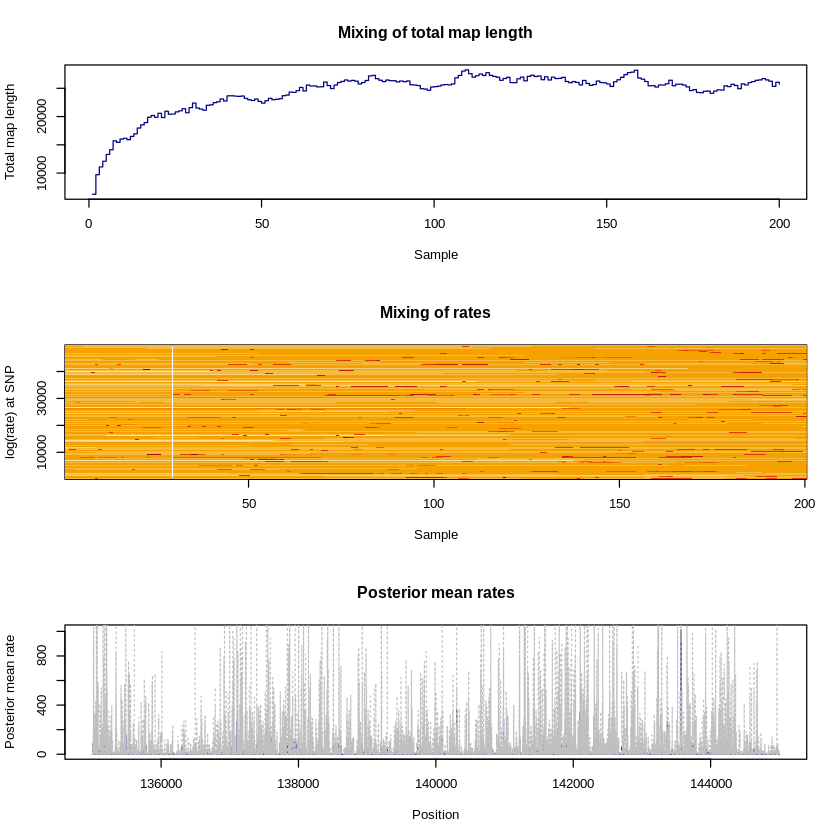

In [2]:
summarise.rhomap(rates.file = "Results/recmap_data_africa.rates.txt", 
                 locs.file="Results/recmap_data_africa.ldhat.locs")



Summarise output from MCMC estimation of recombination rates in INTERVAL (LDhat 2.1)

Number of SNPs = 49868
Number of samples = 200
Burn-in period = 60 samples

Mean posterior total map length (4Ner) = 9863


,Mean,q2.5,Median,q97.5
V1,9.863428e+03,8461.178760,9867.699587,11595.730559
V2,5.840452e-02,0.043357,0.057137,0.074491
V3,1.573837e+01,0.002700,0.004492,0.034032
V4,8.184838e+00,0.028593,0.031003,120.998770
V5,2.918457e+00,0.047836,0.047836,19.348918
V6,1.021469e+00,0.058841,0.058846,2.227455
V7,2.160011e+00,0.059732,0.059738,0.059738
V8,9.207087e-01,0.015944,0.015944,0.023782
V9,4.591936e+00,0.016689,0.024464,41.432184
V10,5.670050e+00,0.017288,0.085822,70.349605


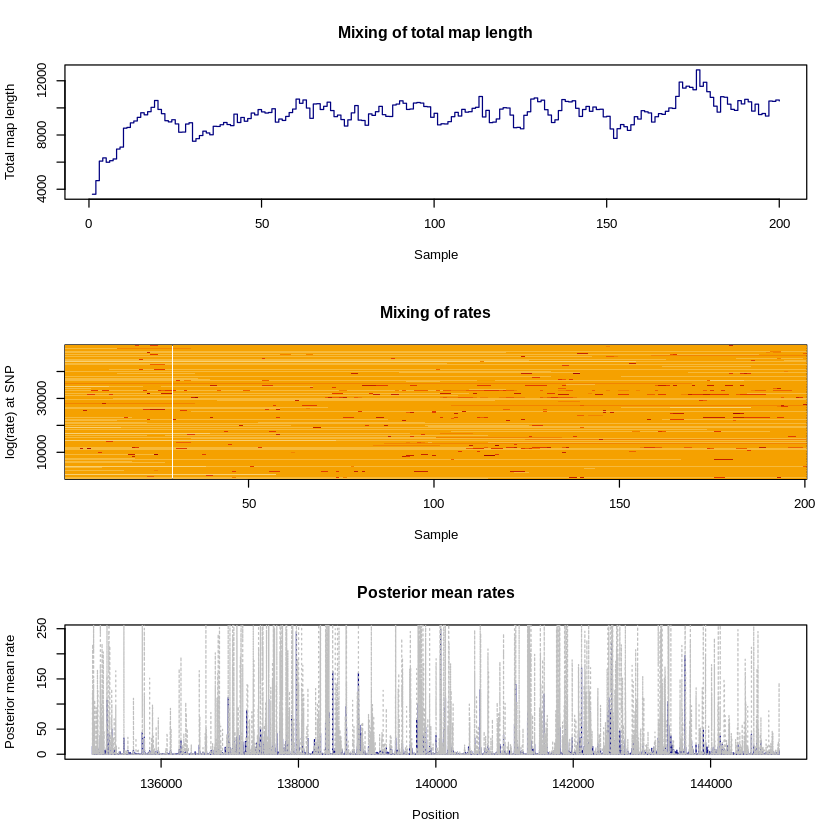

In [3]:
summarise.rhomap(rates.file = "Results/recmap_data_westeurasia.rates.txt", 
                 locs.file="Results/recmap_data_westeurasia.ldhat.locs")

<img src="img/bash.png" alt="Bash" width="80"> Shift to the `Bash` kernel

We run `LDhat stat`. This produces a file called `res.txt` that describes the confidence in the estimated recombination rate along the sequence.

In [1]:
Data/software/builds/LDhat/stat -input Results/recmap_data_africa.rates.txt \
                                -loc Results/recmap_data_africa.ldhat.locs \
                                -burn 60
mv res.txt Results/recmap_data_africa.res.txt



Reading data: 200 lines (miss first 60) of 49868 points.........Data read successfully



Mid = 70, L95=4, U95=136

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [2]:
Data/software/builds/LDhat/stat -input Results/recmap_data_westeurasia.rates.txt \
                                -loc Results/recmap_data_westeurasia.ldhat.locs \
                                -burn 60
mv res.txt Results/recmap_data_westeurasia.res.txt



Reading data: 200 lines (miss first 60) of 49868 points.........Data read successfully



Mid = 70, L95=4, U95=136

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

<img src="img/R.png" alt="R" width="80"> Shift to the `popgen course` kernel

Now we to plot the final results. To have the positions of the loci for which we have estimated mean recombination rates, we will merge the new dataset created with the summary files generated by LDhat:

In [3]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(magrittr)

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”

Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract




We plot the mean of the recombination rate along genome positions. In blue we visualize the average rec. rate, and in gray the 95% confidence interval

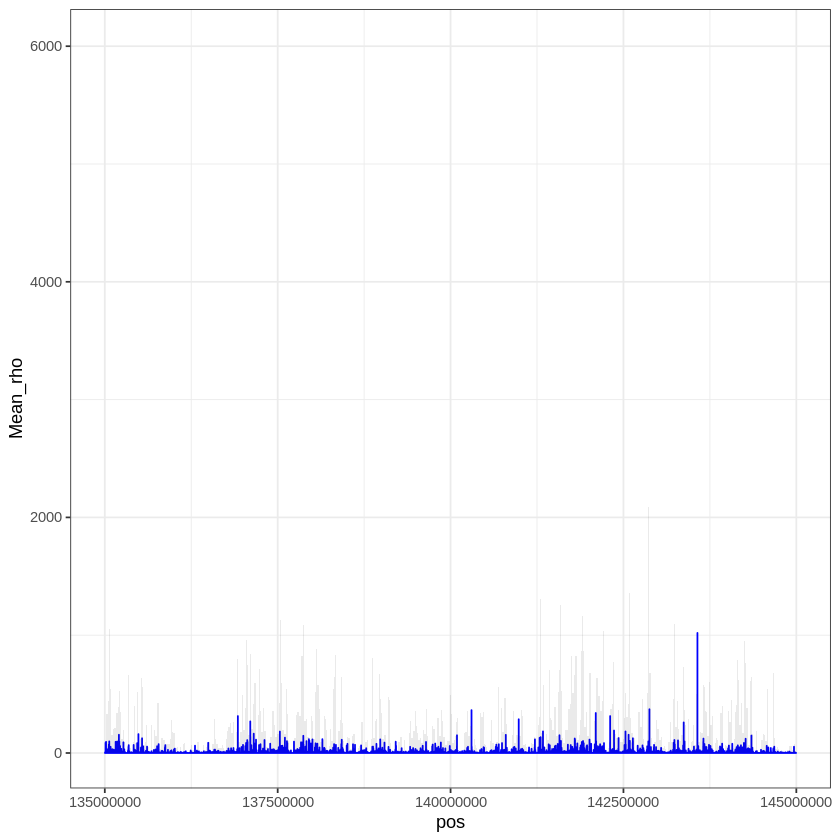

In [4]:
summary <- read.table('Results/recmap_data_africa.summary.txt', header = T)
rates <- read.table("Results/recmap_data_africa.res.txt", header=T)
rates %>%
  filter(Loci > 0) %>%
  mutate(pos=summary$Position.kb.*1000) %>%
  ggplot(aes(x=pos, y=Mean_rho, ymin=L95, ymax=U95)) +  
  geom_line(color='blue') +
  geom_ribbon(alpha=0.1) +
  theme_bw()

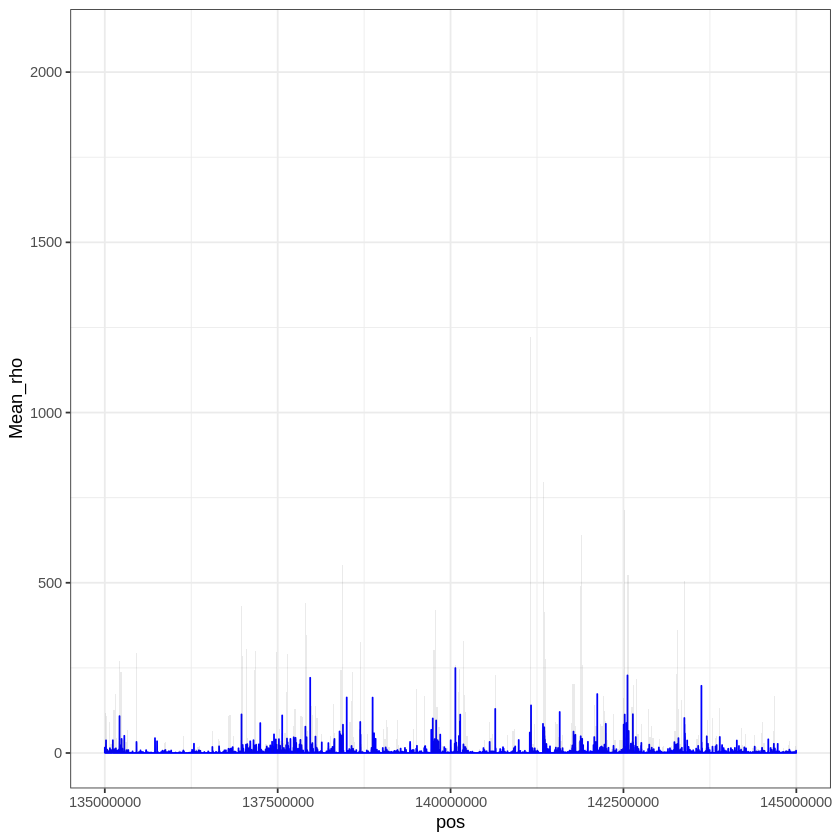

In [5]:
summary <- read.table('Results/recmap_data_westeurasia.summary.txt', header = T)
rates <- read.table("Results/recmap_data_westeurasia.res.txt", header=T)
rates %>%
  filter(Loci > 0) %>%
  mutate(pos=summary$Position.kb.*1000) %>%
  ggplot(aes(x=pos, y=Mean_rho, ymin=L95, ymax=U95)) +  
  geom_line(color='blue') +
  geom_ribbon(alpha=0.1) +
  theme_bw()

Look at the plots and ponder the following questions:

- Are there any recombination hotspots?
- Are there any regions where the estimated recombination rate is really low? 
- Can you see any hotspots in Africans that are not found in West Eurasians - other the othe way around?
- What does the recombination rate look like around the lactase gene?